In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [105]:
data = pd.read_csv("/content/drive/MyDrive/SUT_AI_training/day9/ex3_bike_sharing_daily.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [107]:
data = data.drop(['instant', 'dteday', 'casual'], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,654,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,670,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1518,1600


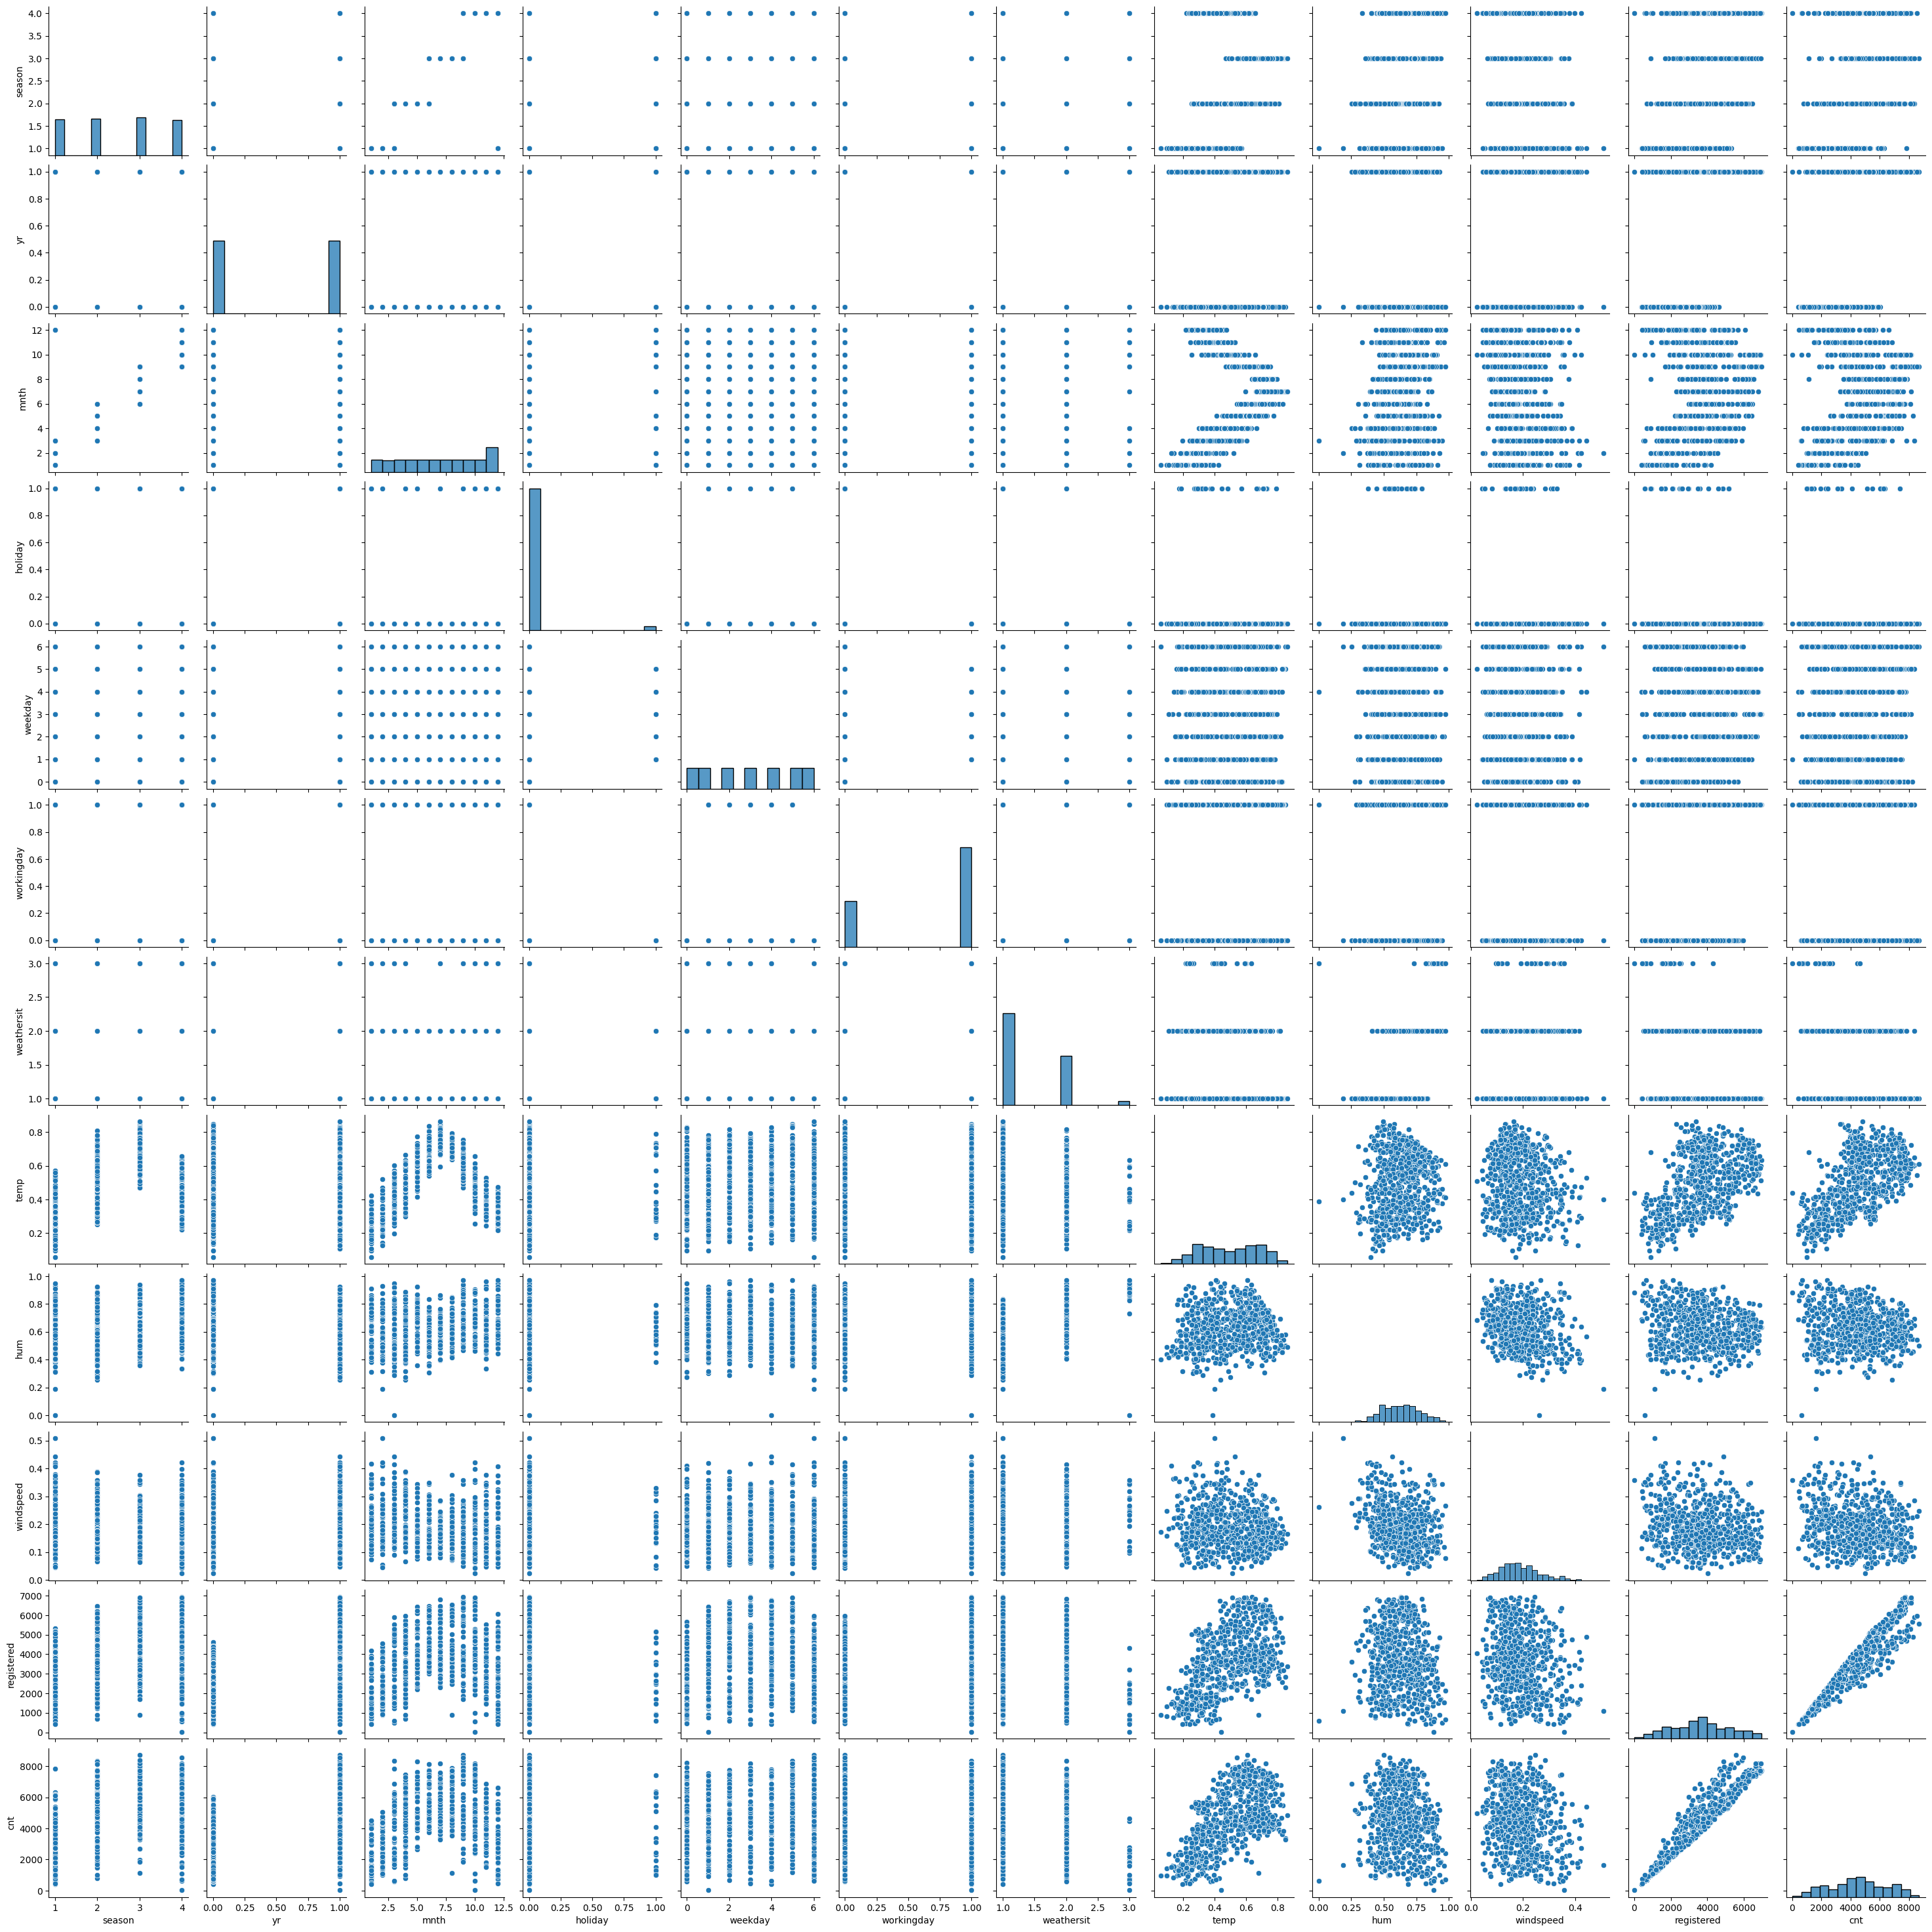

In [108]:
sns.pairplot(data)

In [109]:
X_cat = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
X_num = data[['temp', 'hum', 'windspeed', 'cnt']]
print(X_cat.head(10))
print(X_num.head(10))

   season  yr  mnth  holiday  weekday  workingday  weathersit
0       1   0     1        0        6           0           2
1       1   0     1        0        0           0           2
2       1   0     1        0        1           1           1
3       1   0     1        0        2           1           1
4       1   0     1        0        3           1           1
5       1   0     1        0        4           1           1
6       1   0     1        0        5           1           2
7       1   0     1        0        6           0           2
8       1   0     1        0        0           0           1
9       1   0     1        0        1           1           1
       temp       hum  windspeed   cnt
0  0.344167  0.805833   0.160446   985
1  0.363478  0.696087   0.248539   801
2  0.196364  0.437273   0.248309  1349
3  0.200000  0.590435   0.160296  1562
4  0.226957  0.436957   0.186900  1600
5  0.204348  0.518261   0.089565  1606
6  0.196522  0.498696   0.168726  1510
7  0.1

In [110]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_cat_new = encoder.fit_transform(X_cat).toarray()

In [111]:
X_cat = pd.DataFrame(X_cat_new)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [112]:
X_all = pd.concat([X_cat, X_num], axis= 1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [113]:
X_train = X_all.iloc[:, :-1].values
# y_train = X_all['cnt']
y_train = X_all.iloc[:, -1:].values
print(X_train.shape)
print(y_train.shape)

(731, 35)
(731, 1)


In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train)


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [131]:
import tensorflow as tf
import keras
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu',input_shape=[35]))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 10)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
hist = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=32, validation_split =0.2)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2919 - val_loss: 0.2048
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2078 - val_loss: 0.1346
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1431 - val_loss: 0.0844
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0790 - val_loss: 0.0670
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0620 - val_loss: 0.0556
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0536 - val_loss: 0.0441
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0413 - val_loss: 0.0354
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0342 - val_loss: 0.0279
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - val_loss: 0.0230
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 - val_loss: 0.0198
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - val_loss: 0.0174
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

In [133]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Loss')

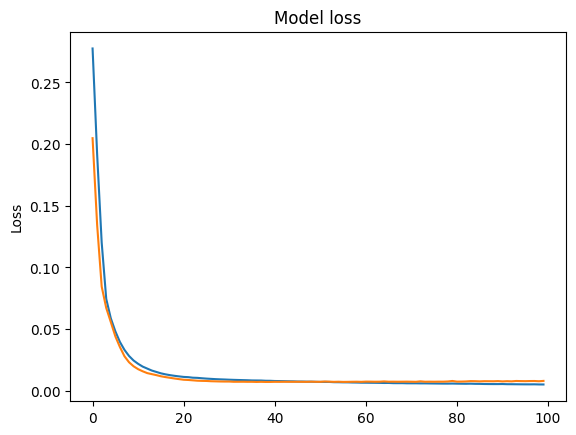

In [134]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


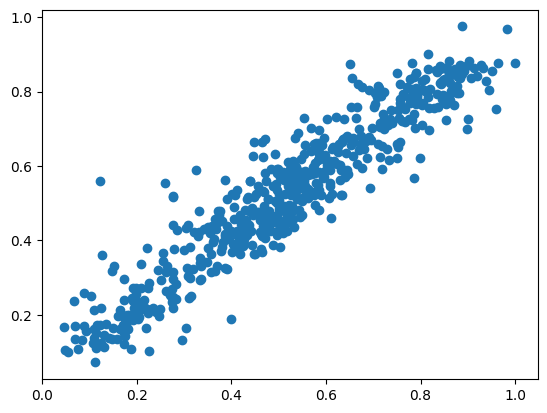

In [135]:
y_pred_train = model.predict(X_train)
plt.scatter(y_train, y_pred_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


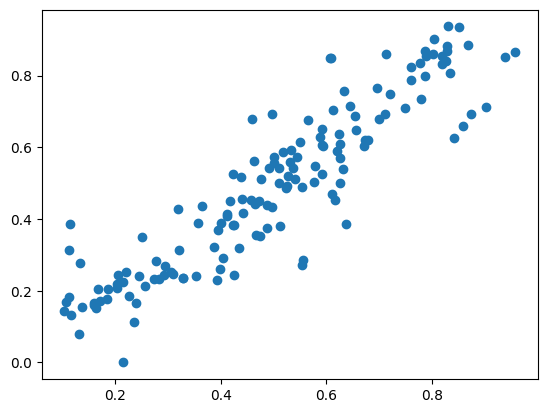

In [136]:
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test)

In [137]:
y_pred_test = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)